In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la baule-escoublac
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | rupert
Processing Record 4 of Set 1 | talcahuano
Processing Record 5 of Set 1 | nova odesa
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | severnyy
Processing Record 10 of Set 1 | cedral
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | itarema
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | capoeiras
Processing Record 16 of Set 1 | golden
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | nioro
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | hir

Processing Record 37 of Set 4 | kajiado
Processing Record 38 of Set 4 | mackay
Processing Record 39 of Set 4 | bom jesus
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | aracati
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | bam
Processing Record 44 of Set 4 | biltine
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | esfarayen
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | mindelo
Processing Record 49 of Set 4 | liepaja
Processing Record 50 of Set 4 | berkovica
Processing Record 1 of Set 5 | effium
Processing Record 2 of Set 5 | waingapu
Processing Record 3 of Set 5 | puerto colombia
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | sendai
Processing Record 6 of Set 5 | medea
Processing Record 7 of Set 5 | tonantins
Processing Record 8 of Set 5 | churapcha
Processing Record 9 of Set 5 | mbalmayo
Processing Record 10 of Set 5 |

Processing Record 26 of Set 8 | aleksandrov gay
Processing Record 27 of Set 8 | skelleftea
Processing Record 28 of Set 8 | klaksvik
Processing Record 29 of Set 8 | shakiso
Processing Record 30 of Set 8 | miyako
Processing Record 31 of Set 8 | sioux lookout
Processing Record 32 of Set 8 | nantucket
Processing Record 33 of Set 8 | surok
Processing Record 34 of Set 8 | mehamn
Processing Record 35 of Set 8 | karaul
City not found. Skipping...
Processing Record 36 of Set 8 | lake havasu city
Processing Record 37 of Set 8 | terrace bay
Processing Record 38 of Set 8 | moose factory
Processing Record 39 of Set 8 | fukue
Processing Record 40 of Set 8 | birin
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | adre
Processing Record 43 of Set 8 | northam
Processing Record 44 of Set 8 | saint-georges
Processing Record 45 of Set 8 | humenne
Processing Record 46 of Set 8 | saint-joseph
Processing Record 47 of Set 8 | mitsamiouli
Processing Record 48 of Set 8 | jablanica
Processin

Processing Record 14 of Set 12 | mahenge
Processing Record 15 of Set 12 | sao joao da barra
Processing Record 16 of Set 12 | barbastro
Processing Record 17 of Set 12 | byron bay
Processing Record 18 of Set 12 | desaguadero
Processing Record 19 of Set 12 | fort nelson
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | jumla
Processing Record 22 of Set 12 | saurimo
Processing Record 23 of Set 12 | kavieng
Processing Record 24 of Set 12 | nara
Processing Record 25 of Set 12 | kouango
Processing Record 26 of Set 12 | terney
Processing Record 27 of Set 12 | soure
Processing Record 28 of Set 12 | port-de-paix
City not found. Skipping...
Processing Record 29 of Set 12 | laramie
Processing Record 30 of Set 12 | saint-augustin
Processing Record 31 of Set 12 | naze
Processing Record 32 of Set 12 | la romana
Processing Record 33 of Set 12 | laguna beach
Processing Record 34 of Set 12 | prince albert
Processing Record 35 of Set 12 | narrabri
Processing Record 36 of Set 12 |

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)[["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Baule-Escoublac,FR,2021-10-21 22:36:05,47.2922,-2.3640,53.01,78,90,6.91
1,Butaritari,KI,2021-10-21 22:36:05,3.0707,172.7902,82.72,72,30,15.35
2,Rupert,US,2021-10-21 22:36:06,42.6191,-113.6772,73.35,23,1,3.44
3,Talcahuano,CL,2021-10-21 22:36:06,-36.7167,-73.1167,58.68,63,20,18.41
4,Nova Odesa,UA,2021-10-21 22:36:07,47.3078,31.7851,53.71,91,8,14.81
5,Ushuaia,AR,2021-10-21 22:36:08,-54.8000,-68.3000,40.66,81,40,29.93
6,Provideniya,RU,2021-10-21 22:36:08,64.3833,-173.3000,26.71,63,75,13.42
7,Severnyy,RU,2021-10-21 22:36:09,50.6770,36.5532,51.84,66,68,15.66
8,Cedral,MX,2021-10-21 22:36:09,23.8000,-100.7333,76.68,33,0,6.46
9,Itarema,BR,2021-10-21 22:36:10,-2.9248,-39.9167,80.42,79,100,11.56


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

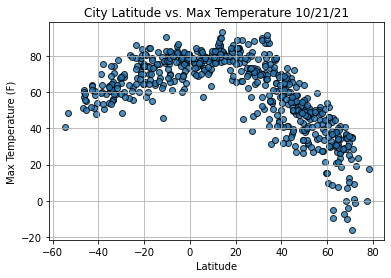

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

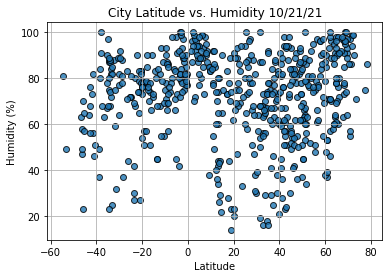

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

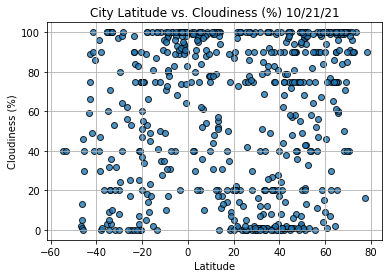

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

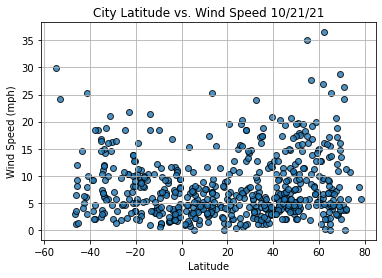

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()